In [504]:
import pandas as pd
import numpy as np
data_amazon = pd.read_excel(r'C:\Users\NQ10004925\Desktop\ML\TechM\CombinedSheetUptoAug2018.xlsx',encoding = "utf-8",skip_rows=1)

In [505]:
#!python -m spacy download en
data_amazon.head()


,TT-No.,closure code,reassigned,response time exceeded,ticket history,solution deadline,response time,critical,Status,solution short description,...,case id,detail description,Master ID,assignee.1,application,100% KPI time,Category-I,Category-II,SubCategory-I,SubCategory-II
0,IMG000002370624,Rejected,no,no,31.01.2018 18:20:10 Remedy Application Service...,2018-02-06 15:31:00,2018-02-06 09:06:00,no,archived,Salcus is working fine currently. No performan...,...,NaN,-Performance Problem auch in anderen Anwendung...,NaN,Remedy Application Service,NaN,2018-02-12 13:31:00,DB,NoDefect,DSL,Performance Issues
1,IMG000002370594,Fixed,no,no,31.01.2018 16:43:48 Remedy Application Service...,2018-04-18 12:14:20,2018-02-05 16:49:48,no,archived,subscription 2146461262 deactivated since 06.0...,...,NaN,"Name des Kunden: Maassen, Franz Salcus-Nr.: ...",NaN,Remedy Application Service,NaN,2018-04-18 13:59:48,DB,DataCleanUp,Mobile,Data Automatic
2,IMG000002370538,Fixed,no,no,31.01.2018 15:51:34 Remedy Application Service...,2018-04-19 09:40:42,2018-02-05 15:57:34,no,archived,listed SI has been deactivated,...,NaN,Note attached files on ticket creation! MSI...,NaN,Remedy Application Service,NaN,2018-04-19 10:33:34,DB,DataCleanUp,DSL,Contract Extension
3,IMG000002370532,Fixed,no,no,31.01.2018 15:48:54 patrol-interface1 New ass...,2018-02-05 14:19:54,2018-02-05 09:30:54,no,archived,Current count is 0.,...,NaN,MSG: Parameter / O2_MCE_TASK_WORKFLOW / O2_MCE...,NaN,patrol-interface1,NaN,2018-02-08 12:49:54,DB,DataCleanUp,Mobile,Order management
4,IMG000002370512,Fixed,no,no,31.01.2018 15:25:20 NQ00070446 New assignment...,2018-02-13 10:57:46,2018-02-05 09:07:20,no,archived,"As confirmed with requestor, issue has been re...",...,NaN,"Hallo zusammen, in SalCus kann bei MNP Expo...",NaN,NQ00070446,NaN,2018-02-16 09:26:20,DB,DataCleanUp,Mobile,MNP


In [506]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
#spacy.load('en_core_web_sm')

In [507]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy.lang.de import German

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
#nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = German()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

148
Index(['TT-No.', 'closure code', 'reassigned', 'response time exceeded',
       'ticket history', 'solution deadline', 'response time', 'critical',
       'Status', 'solution short description', 'solution detail description',
       'short description', 'reason', 'create date', 'closure date',
       'category 2', 'category 1', 'assignment group', 'priority',
       'home assignment group', 'assignee', 'case id', 'detail description',
       'Master ID', 'assignee.1', 'application', '100% KPI time',
       'Category-I ', 'Category-II ', 'SubCategory-I', 'SubCategory-II'],
      dtype='object')


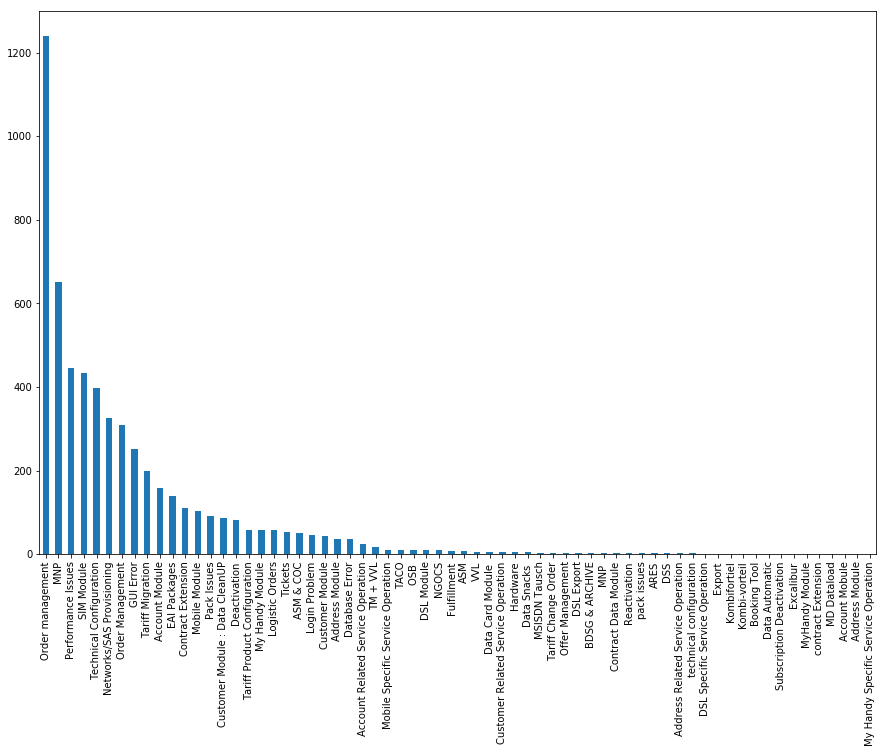

In [508]:
import matplotlib as plt
print(data_amazon['detail description'].isna().sum())
data_amazon = data_amazon.dropna(axis=0, subset=['solution short description'])
data_amazon = data_amazon.dropna(axis=0, subset=['detail description'])
data_amazon = data_amazon.dropna(axis=0, subset=['SubCategory-II'])
#ata_amazon['solution short description'] = data_amazon['solution short description'].str.replace('\D+', '')
#ata_amazon['SubCategory-II'] = data_amazon['SubCategory-II'].str.replace('\D+', '')
data_amazon['SubCategory-II'].value_counts().plot(kind='bar',figsize = (15,10))
#rint(data_amazon['solution short description'].isna().sum())
#rint(data_amazon['solution short description'])
print(data_amazon.columns)

In [509]:
from sklearn.base import TransformerMixin
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()
#dummy = clean_text(dummy)
#print(dummy)

In [510]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [511]:
from sklearn.model_selection import train_test_split
#data_amazon.dropna(subclass = ('SubCategory-II'),inplace=True)
X = data_amazon['detail description']+data_amazon['solution short description'] # the features we want to analyze
ylabels = data_amazon['SubCategory-II']# the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels,test_size = 0.20)
#y_train = y_train.astype(np.int8)
print(X_train.isna().sum())


0


In [512]:
# Logistic Regression Classifier
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression()
#from sklearn.svm import SVC
#classifier = SVC(kernel='linear')
#svclassifier.fit(X_train, y_train)
#from sklearn.ensemble import RandomForestRegressor

#classifier = RandomForestRegressor(n_estimators=20, random_state=0)
import xgboost as xgb
# Create pipeline using Bag of Words
classifier = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x000000D2AAE7ECC0>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
      ...
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])

In [517]:
#average : string[None, ‘binary’ (default), ‘micro’, ‘macro’, ‘samples’, ‘weighted’]
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)
print("Precision Score : ",metrics.precision_score(y_test, predicted, 
                                           pos_label='positive',
                                           average='micro'))
print("recall Score : ",metrics.recall_score(y_test, predicted, 
                                           pos_label='positive',
                                           average='micro'))
print("accuracy Score : ",metrics.accuracy_score(y_test, predicted))

print("F1 Score : ",metrics.f1_score(y_test, predicted, average='micro'))

print("Confusion_matrix : ", metrics.confusion_matrix(y_test, predicted))

# Model Accuracy
#print("SVC Accuracy:",metrics.accuracy_score(y_test, predicted))
#print("SVC Precision:",metrics.precision_score(y_test, predicted))
#print("SVC Recall:",metrics.recall_score(y_test, predicted))

Precision Score :  0.46330680813439434
recall Score :  0.46330680813439434
accuracy Score :  0.46330680813439434
F1 Score :  0.46330680813439434
Confusion_matrix :  [[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 1 8 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
